<a href="https://colab.research.google.com/github/brromeroc/Tareas-Ml/blob/main/Tarea_1%2C_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Solución Tarea 1**

### **1)** Especifique qué problema de Machine Learning está resolviendo.

$\underline{\textit{Solución}}$




Veamos que tipo de datos tenemos, y que intenta solucionar el código

In [186]:
import numpy as np
import pandas as pd
data1=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt", sep=",", header=None)

In [193]:
data1

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


Notemos que lo anterior clasifica a los datos en la ultima columna con 0 o 1, luego el problema que debemos resolver corresponde a aprendizaje de máquina supervisado puesto que los vectores de caracteristicas estan etiquetados con 2  posbiles valores.  

Ahora veamos el segundo dataset

In [188]:
import numpy as np
import pandas as pd
import requests, zipfile, io
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [189]:

f3=z.open("datatraining.txt")    #Datos de entrenamamiento
data21 = pd.read_csv(f3, sep=",")
data21

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [190]:
f1 = z.open("datatest.txt")   #Datos de testeo 1
data22 = pd.read_csv(f1, sep=",")
data22

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [191]:
f1 = z.open("datatest2.txt")   #Datos de testeo2
data23 = pd.read_csv(f1, sep=",")
data23

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9748,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9749,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9750,2015-02-18 09:16:59,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9751,2015-02-18 09:17:59,20.8900,28.022500,418.750000,1632.000000,0.004279,1


Nuevamente  lo anterior clasifica a los datos en la ultima columna con 0 o 1, luego el problema que debemos resolver corresponde a aprendizaje de máquina supervisado puesto que los vectores de caracteristicas estan etiquetados con 2 posbiles valores.

Además el código que se propone en la tarea esta diseñado para clasificar en 2 regiones por medio de SVM, luego nuevamente estamos en aprendizaje de máquina supervisado

Ahora el codigo que se propueso en clase fue el siguiente:

Optimized a step.
Optimized a step.
Optimized a step.


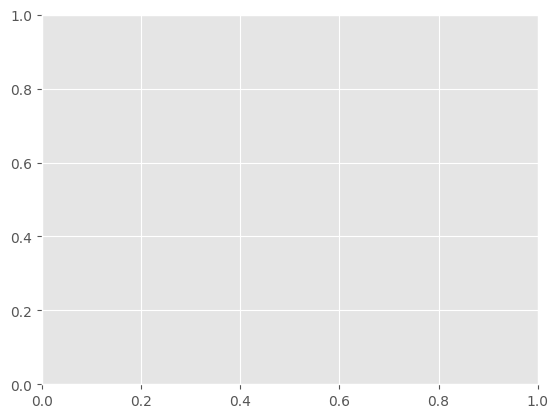

In [192]:
#Código propuesto
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm1 = Support_Vector_Machine()
svm1.fit(data_dict)

### **2)** Proporcione un breve resumen de las características y las etiquetas en las que está trabajando.

$\underline{\textit{Solución}}$

En el $\textit{Primer Dataset}$ (https://archive.ics.uci.edu/ml/datasets/banknote+authentication) se tiene una serie de datos que provienen de imagenes que fueron tomadas para la evaluación de un procedimiento de autenticación de billetes, es decir son datos tomados de especimenes de billetes genuinos y falsos. Para determinar el vector de caracteristicas se usó como herramienta la transformada ondícula (Wavelet Transform) que permite extraer caracteristicas de las imagenes tomadas de los distintos billetes.

Para usar esta herramienta se hace uso de la transformada ondícula integral definida como
$$[W_{ψ}f](a,b) = \frac{1}{\sqrt{|a|}} \int_{-∞}^{∞}\overline{ψ\left(\frac{x-b}{a}\right)}f(x)dx$$
donde $ψ \in L^{2}(\mathbb{R})$ es una función llamada ondícula ortonormal (orthonormal wavelet) que es usada para definir una base de Hilbert, que es un sistema completo ortonormal, para el espacio de Hilbert $L^{2}(\mathbb{R})$ de las funciones cuadrado integrables.

Las caracteristicas que definen cada una de las componentes del vector de caracteristicas son las siguientes:

- Primera componente: Diferencia de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Segunda componente: Asimetría de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Tercera componente: Curtosis de la imagen transformada ondícula (Wavelet Transformed image) - (continua)
- Cuarta componente: Entropía de la imagen - (continua)
- Quinta componente: Clase - (número entero 0 si es falso o 1 si es real)


En el $\textit{Segundo Dataset}$ (https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+) se tiene una serie de datos que establecen la ocupación de la tierra de fotos con sello de tiempo que fueron tomadas cada minuto. Estos datos experimentales fueron usados para clasificación binaria (ocupación de una habitación).

Las caracteristicas que definen cada una de las componentes del vector de caracteristicas son las siguientes:

- Primera componente: Fecha y hora (año-mes-día hora:minutos:segundos)
- Segunda componente: Temperatura en Celsius
- Tercera componente: Humedad relativa (Porcentaje - %)
- Cuarta componente: Luz en Lux
- Quinta componente: CO2 en ppm (Partes por millón)
- Sexta componente: Tasa de humedad, cantidad derivada de la temperatura y la humedad relativa en $\frac{[kg(vapor \; de \; agua)]}{[kg(aire)]}$
- Septima componente: Ocupación, 0 ó 1, 0 para no ocupado y 1 para el estado de ocupado.

In [8]:
data22.to_numpy()

array([['2015-02-02 14:19:00', 23.7, 26.272, ..., 749.2,
        0.0047641630241641, 1],
       ['2015-02-02 14:19:59', 23.718, 26.29, ..., 760.4,
        0.0047726609921251, 1],
       ['2015-02-02 14:21:00', 23.73, 26.23, ..., 769.666666666667,
        0.0047651525524654, 1],
       ...,
       ['2015-02-04 10:40:59', 24.33, 25.7, ..., 1125.8,
        0.0048407587312725, 1],
       ['2015-02-04 10:41:59', 24.3566666666667, 25.7, ..., 1123.0,
        0.0048485592812755, 1],
       ['2015-02-04 10:43:00', 24.4083333333333, 25.6816666666667, ...,
        1124.0, 0.0048602077036219, 1]], dtype=object)

### **3)**  Responda las siguientes preguntas

**a)** ¿Son estos conjuntos de datos linealmente separables?

$\underline{\textit{Solución}}$


Ahora para responder a esta pregunta, utilizaremos el hecho de que dos conjuntos de datos son linealmente separables si y solamente si, la envolvente convexa de cada conjunto de datos no se intersecta, para ver una demostración rigurosa de este hecho se puede consultar $[5]$.

Ahora para implementar esto en python utilizamos el código dado en $[6]$ que nos dice cuando dos envolventes convexas de un conjuntos de puntos se intersectan (basícamente los que hace el codigo es utlizar el  paquete $\texttt{Cvxpy}$ para obtimizar una constante bajo cierta restricción  y de alli deducir si los semiplanos de las restricciones se intersectan)


In [142]:
#Código que encuentra la intersección entre 2 envolventes convexas

import numpy as np
import cvxpy as cvxpy

# Determine feasibility of Ax <= b
# cloud1 and cloud2 should be numpy.ndarrays
def clouds_overlap(cloud1, cloud2):
    # build the A matrix
    cloud12 = np.vstack((-cloud1, cloud2))
    vec_ones = np.r_[np.ones((len(cloud1),1)), -np.ones((len(cloud2),1))]
    A = np.r_['1', cloud12, vec_ones]

    # make b vector
    ntot = len(cloud1) + len(cloud2)
    b = -np.ones(ntot)

    # define the x variable and the equation to be solved
    x = cvxpy.Variable(A.shape[1])
    constraints = [A@x <= b]

    # since we're only determining feasibility there is no minimization
    # so just set the objective function to a constant
    obj = cvxpy.Minimize(0)

    # SCS was the most accurate/robust of the non-commercial solvers
    # for my application
    problem = cvxpy.Problem(obj, constraints)
    problem.solve(solver=cvxpy.SCS)

    # Any 'inaccurate' status indicates ambiguity, so you can
    # return True or False as you please
    if problem.status == 'infeasible' or problem.status.endswith('inaccurate'):
        return True
    else:
        return False

Comenzamos por el $\textit{ Primer Dataset}$  Separando los datos, por aquellos cuya etiqueta es 0, y aquellos cuya etiqueta es 1

In [143]:
datos1array=np.array(data1)


nube1 = [fila for fila in datos1array if fila[4]== 0]
nube1=np.array(nube1)
nube1=nube1[:,0:4]
nube1;

nube2=[fila for fila in datos1array if fila[4]== 1]
nube2=np.array(nube2)
nube2=nube2[:,0:4]
nube2;

In [11]:
print("¿Las envolventes de las nubes de puntos se intersectan?", clouds_overlap(nube1, nube2))


¿Las envolventes de las nubes de puntos se intersectan? True


Con lo anterior vemos que las  envolventes convexas  de las nubes de puntos para las caracteristicas del  primer Dataset  se intersectan, y por tanto el conjunto de datos  $\textbf{NO  es  Linealmente Separables}$

Ahora haremos los mismo con los datos de entrenamiento del $\textit{Segundo Dataset}$

Antes de pasar a ver si son linealmente separables, veamos como podemos poner la fecha como una nueva caracteristica. Para ello notamos que los datos son tomados cada minuto, y se toman desde el $4 $de febrero al $10$ de febrero, por lo que parece razonable ver que tanto varia la ocupación respecto el minuto del dia, para ello dividiremos la fecha comenzando desde $0$ hasta $1440$ (los minutos de un dia) donde $0$ representa las $17:51$  del dia y $1440$ las $17:50$ del dia siguiente, de esta forma tomaremos la fecha modulo $1440$ como se muestra acontinuación.

In [144]:
data21

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [145]:
X=np.array(data21)
data21nodate=X[:,1:7]
fecha=[i%1440 for i in range(0, 8143)]
fecha=np.array([fecha])
fecha=fecha.T
data2array= np.append(fecha, data21nodate, axis=1)
data2array

array([[0, 23.18, 27.272, ..., 721.25, 0.0047929881765052, 1],
       [1, 23.15, 27.2675, ..., 714.0, 0.0047834409493106, 1],
       [2, 23.15, 27.245, ..., 713.5, 0.0047794635244219, 1],
       ...,
       [940, 21.1, 36.095, ..., 798.5, 0.0055956390183456, 1],
       [941, 21.1, 36.26, ..., 820.333333333333, 0.0056214493735085, 1],
       [942, 21.1, 36.2, ..., 821.0, 0.005612063544187, 1]], dtype=object)

**Correlación de Pearson**

Ahora veamos si existe algún tipo de correlación entre la fecha y la ocupación, para esto utilizaremos la correlación de pearson, que nos va servir para resumir la fuerza de la relación lineal entre dos muestras de datos, este se define por

$$r(X,Y)=\frac{Cov(X, Y)} { Stdv(X) * Stdv(Y)}$$

Donde $X,Y$ son variables aleatorias (consultar [8]). Este coeficiente se encuentre entre $-1$ y $1$, y si esta muy cerca de estos dos valores (ie $0.5<|r|<1$) nos dira que hay una correlación muy alta entre $X$ y $Y$.


In [146]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

corr, _ = pearsonr(data2array[0:1440,0], data2array[0:1440,6])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.704


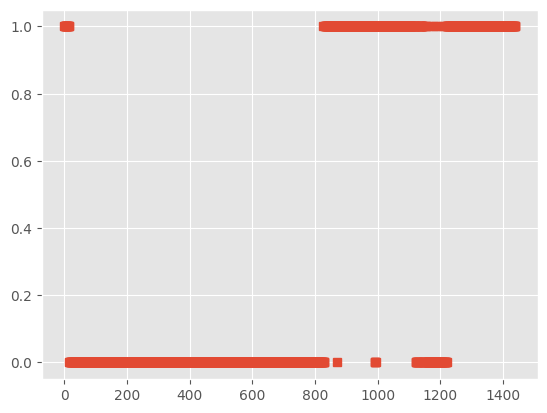

In [147]:
import matplotlib.pyplot as plt

plt.plot(data2array[0:1440,0], data2array[0:1440,6], 's')   #Estamos viendo este coeficiente de correlación solo en el primer dia, dado que los otros dia tienen un coeficiente parecido#

Con lo anterior Vemos que existe un coeficiente de correlación de Pearson de  $0.704$, lo cual es bastante alto, y por tanto esta Caracteristica influye bastante en la ocupación de la sala.

Como observación podemos notar que ente las   $7$ de la mañana ($800$ minutos despues de las $5$ de la tarde) y  las $5$ de la tarde la habitación esta ocupada lo cual hace bastante sentido respecto al problema, pues se esta analizando la ocupación de una habitación de trabajo

In [148]:

nube1 = [fila for fila in data2array if fila[6]== 0]
nube1=np.array(nube1)
nube1=nube1[:,1:6]
nube1;

nube2 = [fila for fila in data2array if fila[6]== 1]
nube2=np.array(nube2)
nube2=nube2[:,1:6]
nube2;

In [141]:
print("¿Las envolventes de las nubes de puntos se intersectan?", clouds_overlap(nube1, nube2))

¿Las envolventes de las nubes de puntos se intersectan? True


Con lo anterior vemos que las  envolventes convexas  de las nubes de puntos para las caracteristicas del  segundo Dataset  se intersectan, y por tanto el conjunto de datos  $\textbf{NO es Linealmente Separables}$

**b)** ¿Se eligen estos conjuntos de datos al azar?

$\underline{\textit{Solución}}$




Ahora dado que lo aleatorio de los datos, depende del experimiento, no podemos apriori dar una afirmación de si estos datos son realmente escocogidos al azar, es por esto que dare un contexto puesto por mi, y sobre este trabajaremos tratando de ajustarselo a la forma tradicional de como se sacarian este tipo de datos

Para el $\textit{Primer Dataset}$ vemos por el punto $2$ que estos datos son tomados de billetes falsos y reales, generalamente este experimento se haria tomando una muestra cualquiera de los ingresos  en un lugar donde se comercie con distintas personas.

In [198]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr

data1array=np.array(data1)

corr1, _ = pearsonr(data1array[:,0], data1array[:,4])
corr2, _ = pearsonr(data1array[:,1], data1array[:,4])
corr3, _ = pearsonr(data1array[:,2], data1array[:,4])
corr4, _ = pearsonr(data1array[:,3], data1array[:,4])
print('Pearsons correlation first variable: %.3f' % corr1)
print('Pearsons correlation second variable: %.3f' % corr2)
print('Pearsons correlation third variable : %.3f' % corr3)
print('Pearsons correlation four variable : %.3f' % corr4)

Pearsons correlation first variable: -0.725
Pearsons correlation second variable: -0.445
Pearsons correlation third variable : 0.156
Pearsons correlation four variable : -0.023


Bajo este supuesto lo mas lógico sería que no supiesemos de antemano cuando un billete es falso o no, es decir, a primera vista no podriamos distinguir entre un billete falso y uno verdadero, pues en caso contrario no valdria la pena hacer el experimento. Si el experimento se plantea desde estas suposiciones lo cual es altamente probable pues ninguna de las variables tiene una correlación directa ($1$ o $-1$) con las etiquetas, podriamos decir que según la definción de aleatorio dada en [9], este experimento es aleatorio

Para el $\textit{Segundo Dataset}$ asumimos que los datos son tomados de una habitación de  la cual no se sabe en que hora del dia hay mayor flujo de personas, es decir, no hay una patron especifico que nos diga dado un dia y una hora saber si hay o no hay alguien en la habitación 

In [199]:
# calculate the Pearson's correlation between two variables
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr


X=np.array(data21)
data21nodate=X[:,1:7]
fecha=[i%1440 for i in range(0, 8143)]
fecha=np.array([fecha])
fecha=fecha.T
data21array= np.append(fecha, data21nodate, axis=1)


corr1, _ = pearsonr(data21array[0:1440,0], data21array[0:1440,6])
corr2, _ = pearsonr(data21array[0:1440,1], data21array[0:1440,6])
corr3, _ = pearsonr(data21array[0:1440,2], data21array[0:1440,6])
corr4, _ = pearsonr(data21array[0:1440,3], data21array[0:1440,6])
corr5, _ = pearsonr(data21array[0:1440,4], data21array[0:1440,6])
corr6, _ = pearsonr(data21array[0:1440,5], data21array[0:1440,6])

print('Pearsons correlation first variable: %.3f' % corr1)
print('Pearsons correlation second variable: %.3f' % corr2)
print('Pearsons correlation third variable : %.3f' % corr3)
print('Pearsons correlation four variable : %.3f' % corr4)
print('Pearsons correlation first variable: %.3f' % corr5)
print('Pearsons correlation second variable: %.3f' % corr6)

Pearsons correlation first variable: 0.704
Pearsons correlation second variable: 0.543
Pearsons correlation third variable : 0.312
Pearsons correlation four variable : 0.887
Pearsons correlation first variable: 0.811
Pearsons correlation second variable: 0.430


Bajo estos supuesto este experimiento sería aleatorio, dado que ninguna caracteriestica se relaciona directamente con la etiqueta como se ve arriba, por lo que aun que sea muy probable obtener uno de los dos resultados dada alguna de las etiquetas, no necesariamente vamos acertar en si hay o no hay una persona en la sala si lo decidimos de antemano.

In [150]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random
import math 





X=data1.to_numpy()
perc= math.trunc(80*(X.shape[0])/100)  #Porcentaje de datos de entrenamiento (80%)

random.seed(6)     #semilla para fijar lista aleatoria
Xlistt=X.tolist()     #lista de todos los datos
Xtrainlist= random.sample(Xlistt, perc)    #Lista aleatoria del 80% de los datos        
Xtestlist= [elem for elem in Xlistt if elem not in Xtrainlist]
Xtestarr=np.array(Xtestlist)  #matriz datos de testeo
Xtrainarr=np.array(Xtrainlist) #matriz datos de entrenamiento

Xtrain=Xtrainarr[:,0:4];   #Caracteristicas de entrenamiento
Ytrain=Xtrainarr[:,4:5];     #Etiquetas de enetranamiento
Ytrain = np.where(Ytrain == 0, -1, 1);   #Cambiar 0's por -1's

Xtest=Xtestarr[:,0:4];   #Caracteristicas de testeo
Ytest=Xtestarr[:,4:5];    #Etiquetas de testeo
Ytest = np.where(Ytest== 0, -1, 1);

**c)** El tamaño de la muestra es suficiente para garantizar la generalización.

$\underline{\textit{Solución}}$

Para dar respuesta a esta pregunta, debemos dar un parametro que nos diga cuando un modelo para nosotros geneneraliza, Dado que en los problemas no se especifica que tanta precisión se espera sobre muestras nuevas, considerare que una buena medida para decir que realmente el modelo predice es $80\%$ de presición, para una muestra aleatoria de datos de testeo  que contenga  de $30$  a $60\%$ de la cantidad de datos de entrenamiento

In [200]:

import numpy as np


class SVM:

    def __init__(self, C = 1.0):
        # C = Termino de error
        self.C = C
        self.w = 0
        self.b = 0

    # Función de Pérdida / Cálculo
    def hingeloss(self, w, b, x, y):
        # Termino de Regularización
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Termino de Optimización
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculando perdida
            loss = reg  #self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # Numero de cararcteristicas en X
        number_of_features = X.shape[1]

        # Numero de ejemplo en X
        number_of_samples = X.shape[0]

        c = self.C

        # Creando ids de 0 a number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Barajar las muestras al azar
        np.random.shuffle(ids)

        # creando una matriz de ceros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Lógica de descenso de gradiente
        for i in range(epochs):
            # Cálculo de la pérdida de bisagra
            l = self.hingeloss(w, b, X, Y)

            #Anexando todas las pérdidas
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)
     

In [38]:
X=data1.to_numpy()
perc= math.trunc(70*(X.shape[0])/100)  #Porcentaje de datos de entrenamiento (70%), con este porcentaje obtenemos 970 datos de entremaniemto y los restantes 412
                                       #datos corresponden al 43% de los datos de entrenamiento.
random.seed(16)     #semilla para fijar lista aleatoria
Xlistt=X.tolist()     #lista de todos los datos
Xtrainlist= random.sample(Xlistt, perc)    #Lista aleatoria del 70% de los datos        
Xtestlist= [elem for elem in Xlistt if elem not in Xtrainlist] #lista de los elementos con los cuales se hara testeo  
Xtestarr=np.array(Xtestlist)  #matriz datos de testeo
Xtrainarr=np.array(Xtrainlist) #matriz datos de entrenamiento

Xtrain=Xtrainarr[:,0:4];   #Caracteristicas de entrenamiento
Ytrain=Xtrainarr[:,4:5];     #Etiquetas de enetranamiento
Ytrain = np.where(Ytrain == 0, -1, 1);   #Cambiar 0's por -1's

Xtest=Xtestarr[:,0:4];   #Caracteristicas de testeo
Ytest=Xtestarr[:,4:5];    #Etiquetas de testeo
Ytest = np.where(Ytest== 0, -1, 1);

In [40]:
svm = SVM()

w, b, losses = svm.fit(Xtrain, Ytrain)

prediction = svm.predict(Xtest)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, Ytest))
print("w, b:", [w, b])

Loss: 0.5368197290290423
Prediction: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  

Dado que el porcentage de presición para esta muestra aleatoria (pseudoaleatoria) con semilla $\texttt{random.seed(16)} $, es mayor al parametro propuesto ($80\%$), entonces podemos asegurar que el tamaño de la muestra es suficiente para generalizar

Ahora dado que el $\texttt{Accuracy}$ puede no ser una buena medidad de desempeño pues puede que halla una gran cantidad de positivos que sean clasificados de manera adecuada, y negativos que por el contrario sean clasificados de manera incorrecta (o visceversa),entonces daremos otro medida de desmpeño con la siguiente matriz de confución. 

**Matriz de confusión**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


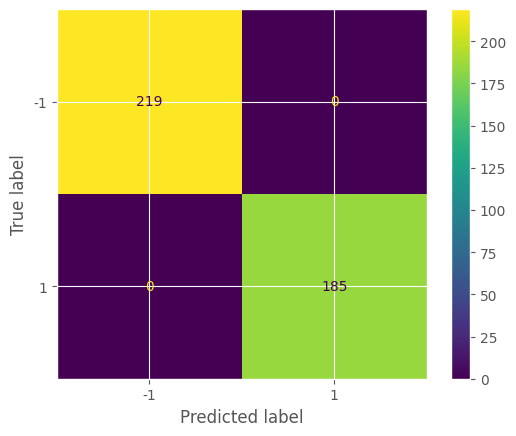

In [41]:


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(Xtrain, Ytrain)
SVC(random_state=0)
predictions = clf.predict(Xtest)
cm = confusion_matrix(Ytest, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

Dado que el $\texttt{Accuracy}$ en este caso es casi del 100%, la matriz de confusión en este caso no proporciona mucha información mas que todos los datos fueron clasificados correctamente

Ahora veamos si el tamaño del $\textit{Segundo dataset}$ es suficiente para garantizar generalización, para ello tomaremos los mismo parametros que en elanterior dataset

In [155]:
data2array[:,6]

array([1, 1, 1, ..., 1, 1, 1], dtype=object)

In [156]:

X=data2array
perc= math.trunc(20*(X.shape[0])/100)  #Porcentaje de datos de entrenamiento (20%). 
random.seed(16)     #semilla para fijar lista aleatoria
Xlistt=X.tolist()     #lista de todos los datos
Xtrainlist= random.sample(Xlistt, perc)    #Lista aleatoria del 20% de los datos        
Xtestlist= [elem for elem in Xlistt if elem not in Xtrainlist] #lista de los elementos con los cuales se hara testeo  
Xtestarr=np.array(Xtestlist)  #matriz datos de testeo
Xtrainarr=np.array(Xtrainlist) #matriz datos de entrenamiento

Xtrain=Xtrainarr[:,0:5];   #Caracteristicas de entrenamiento
Ytrain=Xtrainarr[:,6];     #Etiquetas de enetranamiento
Ytrain = np.where(Ytrain == 0, -1, 1);   #Cambiar 0's por -1's

Xtest=Xtestarr[:,0:5];   #Caracteristicas de testeo
Ytest=Xtestarr[:,6];    #Etiquetas de testeo
Ytest = np.where(Ytest== 0, -1, 1);

In [157]:
svm = SVM()

w, b, losses = svm.fit(Xtrain, Ytrain)

prediction = svm.predict(Xtest)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, Ytest))
print("w, b:", [w, b])

Loss: 90.2979337166695
Prediction: [1. 1. 1. ... 1. 1. 1.]
Accuracy: 0.9504221028396009
w, b: [array([[-12.38245946, -46.39878355, -37.99384786,  72.53145238,
          2.09841374]]), -37.55400000000055]


Dado que el porcentage de presición para esta muestra aleatoria (pseudoaleatoria) con semilla $\texttt{random.seed(16)} $, es mayor al parametro propuesto ($80\%$), entonces podemos asegurar que el tamaño de la muestra es suficiente para generalizar, de hecho el tamaño es muy grande, pues tan solo con el $20\%$ de los datos totales pudimos generalizar con satisfacción.

Ahora al igual que en el anterior dataset podemos utilizar la matriz de confusión para ver si los datos estan siendo clasificados de la manera adecuada 

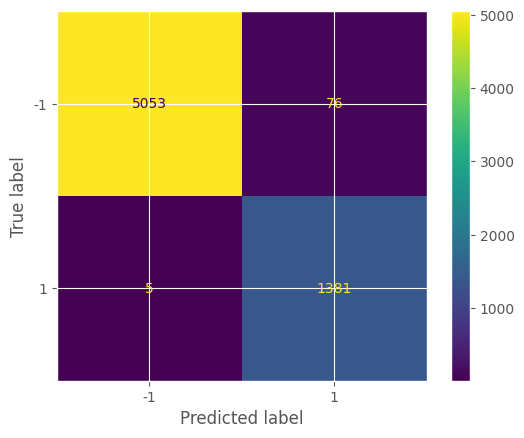

In [158]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(Xtrain, Ytrain)
SVC(random_state=0)
predictions = clf.predict(Xtest)
cm = confusion_matrix(Ytest, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

Notemos que en este caso el porcentaje de $-1$ que fueron clasificados correctamente es mucho mayor al prcentaje de $1$ que fueron clasificados correctamente (respecto a la cantidad de $1$'s y $-1$'s obtenidos en la prediccción  respectavamente ), de esta manera podemos ver que la medida de $\texttt {Accuracy}$ no es tan buena en este caso

### **4)**   Proporcione una explicación de cómo y por qué funciona el código. Puede agregar comentarios y/o explicaciones formales en el cuaderno.

$\underline{\textit {Solución}}$

Acontinuación se muestra el código con las explicaciones de cada definicion de la clase.

Optimized a step.
Optimized a step.
Optimized a step.


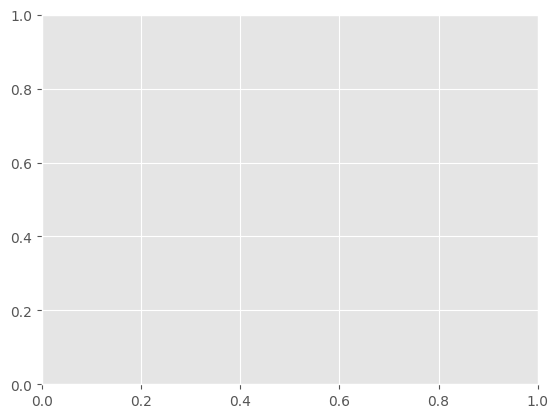

In [27]:
# https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd

style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        # La subclase llama los datos para utilizarlos
        self.data = data
        # { ||w||: [w,b] }
        # El diccionario va a almacenar las parejas [w,b] etiquetadas por la norma de w (||w||) tales que satisfagan que yi(xi.w+b) >= 1
        
        opt_dict = {}

        # El vector de vectores llamado transforms va a ser utilizado para evaluar todas las posibles direcciones que puede tomar un vector w dado. De esta manera, se
        # examinan todas las posibles lineas determinadas por un vector de entrada w.
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        # Se crea temporalmente un arreglo para buscar el número máximo entre todos los datos para usar este valor como un parametro que determine los rangos de operación
        # de todo el programa, así como para fijar cual va a ser el vector w inicial en el programa.
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        # Se determina cual es el valor más pequeño y más grande de todos los datos y despues se vacia el arreglo "all_data" para no ocupar una gran cantidad de memoria.
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        
        # En esta parte se establecen los pasos en los cuales se va a ir variando el vector w para el proceso de optimización.
        # Inicialmente se dan pasos "grandes" hasta llegar a un punto en donde el vector w(i+1) supere al vector w(i) y despues se sigue la iteración con los pasos más pequeños.

        # Esta estrategia de usar pasos que varien el vector w es funcional porque el problema de minimizar la norma de w es un problema de optimización convexa en el cual se sabe
        # que existe un mínimo global de la función
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive

        # En esta parte se establecen las variables que definiran el rango donde variará el escalar b para determinar si cierta escogencia de w 
        # cumple que yi(xi.w+b) >= 1 para todos los datos.

        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w

        # Aquí no es necesario tener la misma precisión de la escogencia de b a diferencia de como se escoge w puesto que el valor de b no tiene muchas restricciones 
        # en la condición yi(xi.w+b) >= 1 lo cual permite ahorrar tiempo de computo. Sin embargo, se desea en la medida de lo posible que para los datos de entrenamiento
        # los valores de b esten sujetos a la condición de frontera yi(xi.w+b) = 1
        b_multiple = 5
        latest_optimum = self.max_feature_value*10 #Este valor sera el que determinara todas las componentes del vector w inicial y en las iteraciones posteriores se ira cambiando

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            # Esta escogencia permite ahorrar tiempo de computo y es razonable puesto que el problema es de optimización convexa.
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                  # En esta parte del código se evalua para cada w los posibles b que puedan satisfacer la restricción yi(xi.w+b) >= 1

                    for transformation in transforms:
                        w_t = w*transformation
                        # Aquí se evalua cada una de las posibles direcciones que puede tomar w
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                # Verifiy constraints
                                # En esta parte se determina si la escogencia particular de w y b satisfacen la restricción yi(xi.w+b) >= 1
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            # Computes norm
                            # Una vez encontrada una pareja [w,b] para la cual se satisface la restricción yi(xi.w+b) >= 1, se procede a guardarla en un diccionario
                            # etiquetado por la norma de w para despues poder hacer la busqueda y escoger el w con norma más pequeña
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                # En esta parte se determina cuando el programa llega al final de aplicar la serie de pasos mirando cuando la primera componente del vector w cambia de signo
                # en este caso no importa que componente se mira, porque todas estan definidas igual.
                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            # En esta última parte se ordena el diccionario "opt_dict" de tal forma que la primera entrada sea el [w,b] donde w tiene la menor norma (min||w||)
            # y apartir de ahí escoger el nuevo w que va ir cambiando con pasos más pequeños y así ir mejorando la escogencia de w.
            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
    # En esta parte se desarrolla la predicción para un conjunto de datos de prueba. Para hacer la clasificación se mira la función sign( x.w+b )
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
# Este es el diccionario que contiene todos los datos de entrenamiento, clasificados por -1 si no tiene la caracteristica en estudio y 1 si tiene la caracteristica en estudio      
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

# Aquí se llama a la clase Support_Vector_Machine() como svm1
svm1 = Support_Vector_Machine()

# Aquí se ejecuta la subclase de entrenamiento de la clase svm1 usando los datos de entrenamiento definidos en el diccionario "data_dict"
svm1.fit(data_dict)

### **5)** Muestre algunos ejemplos para ilustrar que el método está funcionando correctamente.

$\underline{\textit {Solución}}$


El primer ejemplo que utlizaremos es el de entranar el algoritmo  con los siguientes datos: 

$$A_1=[1,7],A_2=[2,8],A_3=[3,8]\hspace{6mm} R_1=[5,1],R_2=[6,-1],R_3=[7,3]$$

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


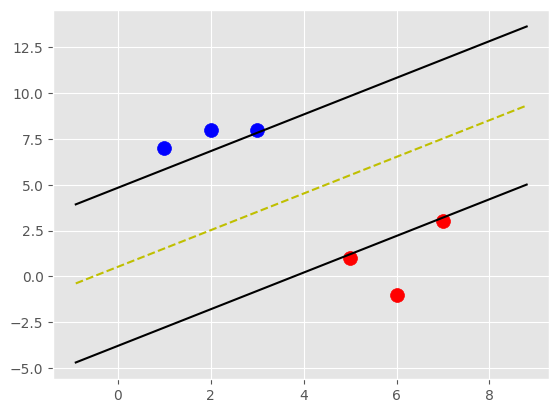

In [28]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)
svm.visualize()





Ahora con lo anterior,  ulizando la clase  $\texttt{svm.predict}$, veamos como con nuevos datos, este predice donde los debe ubicar, para ello utlizaremos los puntos: 


$p_1=[0,10]\\
p_2=[1,3]\\
p_3=[3,4]\\
p_4=[3,5]\\
p_5=[5,5]\\
p_6=[5,6]\\
p_7=[6,-5]\\
p_8=[5,8]$

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


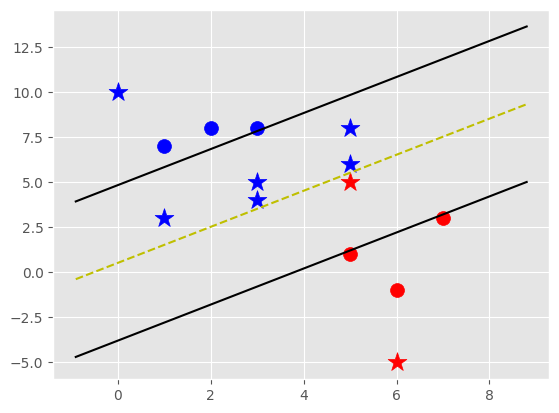

In [29]:

data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()


Esto muestra que realmente el modelo clasifica como queremos nuevos datos, pues los separa en los grupos en donde se acercan mas a los datos de  entrenamiento.

### **6)** Proporcionar evidencia cuantitativa para la generalización utilizando el conjunto de datos proporcionado.

$\underline{\textit{Solución}}$

Primero utilizemos el $\textit{Primer Dataset}$ para ver si podemos generalizar sobre algunos datos, para ello vamos a tomar $80\%$ de estos datos como entranamiento, y el restante  $20\%$ los vamos a predecir, al igual que en el punto **3)**, diremos que se generaliza sobre la muestra de testeo si podemos obtener una presición de mas del $80\%$.

In [30]:
import numpy as np


class SVM:

    def __init__(self, C = 1.0):
        # C = Termino de error
        self.C = C
        self.w = 0
        self.b = 0

    # Función de Pérdida / Cálculo
    def hingeloss(self, w, b, x, y):
        # Termino de Regularización
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Termino de Optimización
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculando perdida
            loss = reg + self.C * max(0, 1-opt_term)
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # Numero de cararcteristicas en X
        number_of_features = X.shape[1]

        # Numero de ejemplo en X
        number_of_samples = X.shape[0]

        c = self.C

        # Creando ids de 0 a number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Barajar las muestras al azar
        np.random.shuffle(ids)

        # creando una matriz de ceros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # Lógica de descenso de gradiente
        for i in range(epochs):
            # Cálculo de la pérdida de bisagra
            l = self.hingeloss(w, b, X, Y)

            #Anexando todas las pérdidas
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [31]:
data1

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [32]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import random
import math 





X=data1.to_numpy()
perc= math.trunc(80*(X.shape[0])/100)  #Porcentaje de datos de entrenamiento (80%)

random.seed(3)     #semilla para fijar lista aleatoria
Xlistt=X.tolist()     #lista de todos los datos
Xtrainlist= random.sample(Xlistt, perc)    #Lista aleatoria del 80% de los datos
Xtestlist= [elem for elem in Xlistt if elem not in Xtrainlist] #Lista de datos de testeo (20% del total de los datos)
Xtestarr=np.array(Xtestlist)  #matriz datos de testeo
Xtrainarr=np.array(Xtrainlist) #matriz datos de entrenamiento

Xtrain=Xtrainarr[:,0:4];   #Caracteristicas de entrenamiento
Ytrain=Xtrainarr[:,4:5];     #Etiquetas de enetranamiento
Ytrain = np.where(Ytrain == 0, -1, 1);   #Cambiar 0's por -1's

Xtest=Xtestarr[:,0:4];   #Caracteristicas de testeo
Ytest=Xtestarr[:,4:5];    #Etiquetas de testeo
Ytest = np.where(Ytest== 0, -1, 1);


In [33]:

svm = SVM()

w, b, losses = svm.fit(Xtrain, Ytrain)

prediction = svm.predict(Xtest)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, Ytest))
print("w, b:", [w, b])

Loss: 0.4563254359738413
Prediction: [ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  

Deterministicamente no podemos generalizar, pero dados los parametros de generalización (probabilisitcos) podemos decir que para la  semilla $\texttt{random.sedd(3)}$, la precisión que se obtiene es del $99,62\%$ de los datos, es decir, sobre los $275$ datos de prueba alrededor de $272$ (20\% del total de los datos), fueron bien clasificados, por lo tanto podemos decir que bajo los parametros de generalización planteados , podemos asegurar que este modelo generaliza.

Ahora vamos hacer lo mismo pero  con el $\textit{Segundo Dataset}$

In [179]:
#Entrenamiento 

X=np.array(data21)
data21nodate=X[:,1:7]
fecha=[i%1440 for i in range(0, 8143)]
fecha=np.array([fecha])
fecha=fecha.T
data21array= np.append(fecha, data21nodate, axis=1)
data21array

X=data21array
X=X[:,0:7]
perc= math.trunc(20*(X.shape[0])/100)  #Porcentaje de datos de entrenamiento (20%)

random.seed(3)     #semilla para fijar lista aleatoria
Xlistt=X.tolist()     #lista de todos los datos
Xtrainlist= random.sample(Xlistt, perc)    #Lista aleatoria del 20% de los datos
Xtrainarr=np.array(Xtrainlist) #matriz datos de entrenamiento

Xtrain=Xtrainarr[:,0:6];   #Caracteristicas de entrenamiento
Ytrain=Xtrainarr[:,6];     #Etiquetas de enetranamiento
Ytrain = np.where(Ytrain == 0, -1, 1);   #Cambiar 0's por -1's

#-------------------------------------------------------------------------------------------------------------------------------------------------------

#Test 1

X=np.array(data22)
data22nodate=X[:,1:7]
fecha=[(i-212)%1440 for i in range(0, 2665)]
fecha=np.array([fecha])
fecha=fecha.T
data22array= np.append(fecha, data22nodate, axis=1)
data22array


X=data22array
perc1= math.trunc(30*(X.shape[0])/100)  #Porcentaje de datos de testeo (30%)

random.seed(3)     #semilla para fijar lista aleatoria
Xlistt1=X.tolist()     #lista de todos los datos
Xtestlist1= random.sample(Xlistt1, perc1)    #Lista aleatoria del 80% de los datos
Xtestarr1=np.array(Xtestlist1)  #matriz datos de testeo

Xtest1=Xtestarr1[:,0:6];   #Caracteristicas de testeo
Ytest1=Xtestarr1[:,6];    #Etiquetas de testeo
Ytest1 = np.where(Ytest1== 0, -1, 1);
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#Test 2

X=np.array(data23)
data23nodate=X[:,1:7]
fecha=[(i-183)%1440 for i in range(0, 9752)]
fecha=np.array([fecha])
fecha=fecha.T
data23array= np.append(fecha, data23nodate, axis=1)
data23array

X=data23array
X=X[:,0:7]
perc2= math.trunc(30*(X.shape[0])/100)  #Porcentaje de datos de testeo (30%)

random.seed(3)     #semilla para fijar lista aleatoria
Xlistt2=X.tolist()     #lista de todos los datos
Xtestlist2= random.sample(Xlistt2, perc2)    #Lista aleatoria del 80% de los datos
Xtestarr2=np.array(Xtestlist2)  #matriz datos de testeo

Xtest2=Xtestarr2[:,0:6];   #Caracteristicas de testeo
Ytest2=Xtestarr2[:,6];    #Etiquetas de testeo
Ytest2 = np.where(Ytest2== 0, -1, 1);
#-------------------------------------


Primero testeamos con la primer partición

In [180]:
svm = SVM()

w, b, losses = svm.fit(Xtrain, Ytrain)

prediction = svm.predict(Xtest1)        

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, Ytest1))
print("w, b:", [w, b])

Loss: 247.73920677140785
Prediction: [-1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.
  1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.
 -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.  1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.
  1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.
  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1. -1.  1.
  1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1. -

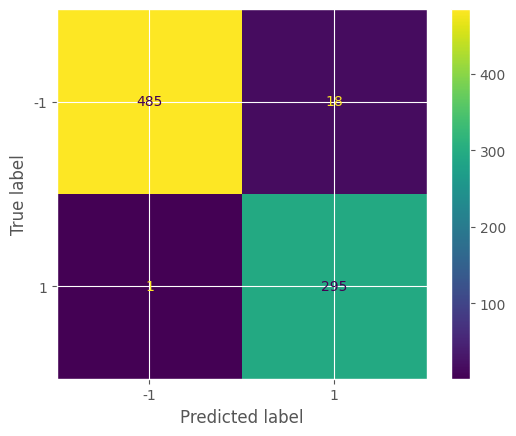

In [181]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(Xtrain, Ytrain)
SVC(random_state=0)
predictions = clf.predict(Xtest1)
cm = confusion_matrix(Ytest1, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

En este caso vemos que la predicción favorece mayoritariamente a las etiquetas negativas, es decir, es mas confiable, si una prediccion nos da que es 
$-1$, que si una predicción nos da $1$, pues esto último puede ser en un porcentaje mas alto falso ($6$% del total de los $1$'s que se predijieron). En este caso es mas confiable utilizar como medida de desempeño la matriz de confusión.

Ahora veamos que tan exacto es el modelo  con los segundos datos de testeo

In [182]:
svm = SVM()

w, b, losses = svm.fit(Xtrain, Ytrain)

prediction = svm.predict(Xtest2)

# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, Ytest2))
print("w, b:", [w, b])

Loss: 161.05949774167507
Prediction: [-1. -1. -1. ... -1. -1.  1.]
Accuracy: 0.984957264957265
w, b: [array([[-1.70074348e+01, -4.29847521e+01, -3.48779289e+01,
         6.56493105e+01,  8.16564222e-01, -5.19744895e-03]]), -35.20700000000005]


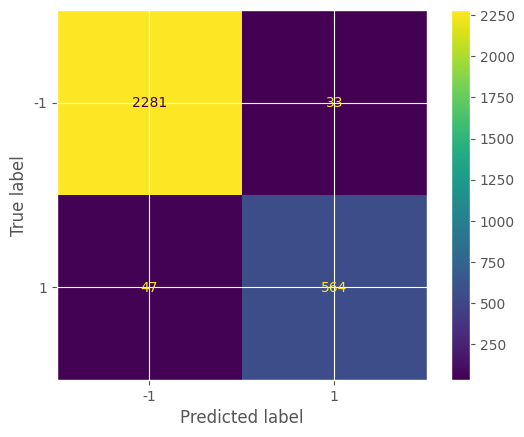

In [183]:
clf = SVC(random_state=0)
clf.fit(Xtrain, Ytrain)
SVC(random_state=0)
predictions = clf.predict(Xtest2)
cm = confusion_matrix(Ytest2, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

En este caso vemos que la predicción favorece mayoritariamente a las etiquetas negativas, es decir, es mas confiable, si una prediccion nos da que es 
$-1$, que si una predicción nos da $1$, pues esto último puede ser en un porcentaje mas alto falso ($5$% del total de los $1$'s que se predijieron). En este caso es mas confiable utilizar como medida de desempeño la matriz de confusión.

Con el anterior análisis podemos asegurar (Bajo nuestro parametros de generalización) que nuestro modelo generaliza. Además si quisieramos sacar un modelo aún mas robusto podriamos entrenar con los datos de que teniamos de training y unirle los datos que tuvimos del segundo testeo pues este predice mejor los $-1$'s que con el modelo que obtuvimos con los datos del primer testeo

### **Referencias** 



[1].   The HundredPage Machine Learning,Andriy Burkov, 2019. 

[2].   Support Vector Machine Optimization in Python, https://pythonprogramming.net/svm-optimization-python-2-machine-learning-tutorial/?completed=/svm-optimization-python-machine-learning-tutorial/

[3].  Visualization and Predicting with our Custom SVM: https://pythonprogramming.net/predictions-svm-machine-learning-tutorial/?completed=/svm-optimization-python-2-machine-learning-tutorial/

[4]. Implementing SVM from Scratch Using Python: https://www.pycodemates.com/2022/10/implementing-SVM-from-scratch-in-python.html

[5]. ConvexHull and linear separability: https://web.mit.edu/dxh/www/convex.pdf

[6]. Intersección entre envolventes convexas: https://stackoverflow.com/questions/59416730/determining-whether-two-convex-hulls-overlap

[7]. scipy.spatial.ConvexHull: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html


[8]. Pearson correlation: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

[9]. Experimiento aleatorio: https://www.educarex.es/pub/cont/com/0019/documentos/pruebas-acceso/contenidos/modulo_IV/matematicas/4mat08.pdf

# Algo de convexhull  y simplejos 


## Por simplejos 


In [ ]:
  


from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np

random.seed(1)
rng = np.random.default_rng()

random.seed(1)
points = rng.random((30, 2))   # 30 random points in 2-D
hull = ConvexHull(points)

In [ ]:
print(points)

[[0.71477003 0.61190217]
 [0.70508319 0.47450759]
 [0.75081038 0.24944748]
 [0.64146325 0.32237822]
 [0.93969272 0.19923531]
 [0.33139127 0.71934934]
 [0.4122011  0.53051349]
 [0.72637734 0.41649601]
 [0.06701541 0.95439227]
 [0.86408685 0.57340161]
 [0.82673407 0.05590994]
 [0.7092171  0.01849625]
 [0.71572093 0.65924022]
 [0.24216446 0.58387588]
 [0.53270931 0.22601714]
 [0.49148519 0.38868014]
 [0.65277253 0.87420492]
 [0.4748887  0.11510647]
 [0.37359237 0.18234201]
 [0.99565008 0.81867653]
 [0.9858539  0.26165246]
 [0.0493151  0.27735648]
 [0.41492874 0.21599686]
 [0.67861739 0.30353838]
 [0.53370409 0.73731533]
 [0.65313169 0.23353738]
 [0.22744136 0.08837658]
 [0.49139907 0.25430657]
 [0.19522923 0.29617034]
 [0.42172237 0.85420716]]


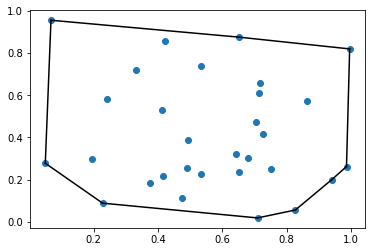

In [ ]:
import matplotlib.pyplot as plt
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

In [ ]:
hull.simplices # Nos dice los puntos que estan en la frontera, y las tuplas que aparecen son los puntos que se unen, por ejemplo [8,21] es que el punto numero 15 en points se une con el punto numero 20 

array([[ 8, 21],
       [16, 19],
       [16,  8],
       [26, 21],
       [20, 19],
       [11, 10],
       [11, 26],
       [ 4, 10],
       [ 4, 20]], dtype=int32)

In [ ]:
points[[0,9],0]

array([0.66473961, 0.22528124])

In [ ]:
points[[15,9],1]

array([0.05289575, 0.01600058])

## Por vertices

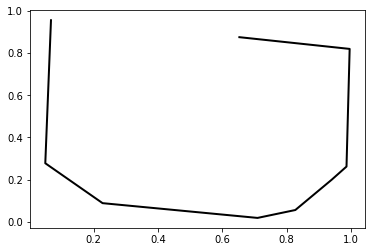

In [ ]:
plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'k-', lw=2)  #Primera coordenada de los vertices, segunda cordenada de los vertices
#plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'o')
plt.show()

In [ ]:
hull.vertices #hull.vertices nos da una array donde estan los numerales de los puntos que son vertices, en este caso los puntos  8, 21, 26, 11, 10,  4, 20, 19, 16 en points son vertices

array([ 8, 21, 26, 11, 10,  4, 20, 19, 16], dtype=int32)

In [ ]:
envolvente=points[hull.vertices]   #esto nos da la matriz de los puntos que son vertices

In [ ]:
import numpy as np
import cvxpy as cvxpy

# Determine feasibility of Ax <= b
# cloud1 and cloud2 should be numpy.ndarrays
def clouds_overlap(cloud1, cloud2):
    # build the A matrix
    cloud12 = np.vstack((-cloud1, cloud2))
    vec_ones = np.r_[np.ones((len(cloud1),1)), -np.ones((len(cloud2),1))]
    A = np.r_['1', cloud12, vec_ones]

    # make b vector
    ntot = len(cloud1) + len(cloud2)
    b = -np.ones(ntot)

    # define the x variable and the equation to be solved
    x = cvxpy.Variable(A.shape[1])
    constraints = [A@x <= b]

    # since we're only determining feasibility there is no minimization
    # so just set the objective function to a constant
    obj = cvxpy.Minimize(0)

    # SCS was the most accurate/robust of the non-commercial solvers
    # for my application
    problem = cvxpy.Problem(obj, constraints)
    problem.solve(solver=cvxpy.SCS)

    # Any 'inaccurate' status indicates ambiguity, so you can
    # return True or False as you please
    if problem.status == 'infeasible' or problem.status.endswith('inaccurate'):
        return True
    else:
        return False



In [ ]:

pointinside=np.array([[0.5,0.5]])
envolvente=points[hull.vertices] 
pointoutside=np.array([[0.6,0.9],[0.5,9]])

print("Clouds overlap?", clouds_overlap(envolvente, pointinside))
print("Clouds overlap?", clouds_overlap(envolvente, pointoutside))


Clouds overlap? True
Clouds overlap? False


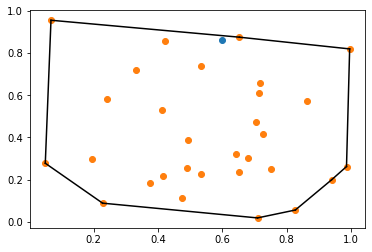

In [ ]:
import matplotlib.pyplot as plt
plt.plot(0.6,0.86, 'o')
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')




4.  Mirar lo de la generalización segun lo último visto en clase con la dimención Vc y la cantidad de datos
1. utilizar skylearn para predecir con perceptron y arboles de desición




